# Import important modules 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import warnings
import seaborn as sns
import random as rd
import sys


sys.path.append('../scripts')
from pickle_file_handlers import HandlePickle
from cleaner import CleanDataFrame
from plotter import Plotter
from logger import logger
# from ml_pipeline import dvc_get_data

In [8]:
diagnostic_df = pd.read_csv('../data/data.csv')
diagnostic_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
diagnostic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
diagnostic_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [15]:
diagnostic_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [16]:
diagnostic_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [29]:
#removing the unnecessary columns
exclude = ['Unnamed: 32','id','diagnosis']
target = diagnostic_df['diagnosis']
extracted_df = diagnostic_df.drop(exclude, axis = 1)
extracted_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(extracted_df)

features_scaled = scaler.transform(extracted_df)
features_scaled = pd.DataFrame(data=features_scaled,
                               columns=extracted_df.columns)

df_scaled = pd.concat([features_scaled, target], axis=1)

In [53]:
df_scaled_melt = pd.melt(df_scaled, id_vars='diagnosis',
                         var_name='features', value_name='value')
df_scaled_melt.head(3)

,diagnosis,features,value
0,M,radius_mean,1.097064
1,M,radius_mean,1.829821
2,M,radius_mean,1.579888


In [20]:
diagnostic_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

2022-06-29 05:01:28,903:logger:successfully displayed count plot


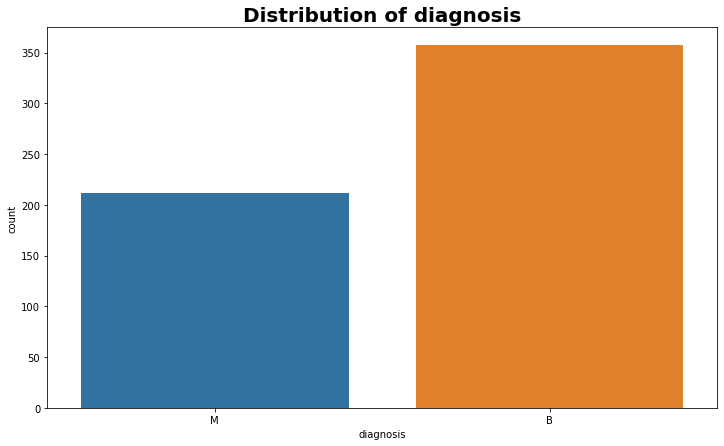

In [10]:
plot = plotter.plot_count(diagnostic_df,'diagnosis') #Add Names of Each

In [71]:
def violin_plot(features, name):
    """
    This function creates violin plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]
    data = df_scaled_melt.query(query)
    # Create data for visualization
    # data = df_scaled_melt[features]

    # # print(data)
    # print(target)
    # data = pd.concat([target,data], axis=1)
    # # print(data)
    # data = pd.melt(data,
    #                id_vars="diagnosis",
    #                var_name="features",
    #                value_name='value')

    # Plot figure
    print(data.columns)
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='features',
                   y='value',
                   hue='diagnosis',
                   data=data,
                   split=True,
                   inner="quart")
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")


def swarm_plot(features, name):
    """
    This function creates swarm plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    print(query)
    data = df_scaled_melt.query(query)
    # data = diagnostic_df[features]

    # # print(data)
    # print(target)
    # data = pd.concat([target,data], axis=1)
    # # print(data)
    # data = pd.melt(data,
    #                id_vars="diagnosis",
    #                var_name="features",
    #                value_name='value')

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")


def box_plot(features, name):
    """
    This function creates box plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)
    # data = diagnostic_df[features]

    # # print(data)
    # print(target)
    # data = pd.concat([target,data], axis=1)
    # # print(data)
    # data = pd.melt(data,
    #                id_vars="diagnosis",
    #                var_name="features",
    #                value_name='value')

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='features', y='value', hue='diagnosis', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")

Index(['diagnosis', 'features', 'value'], dtype='object')


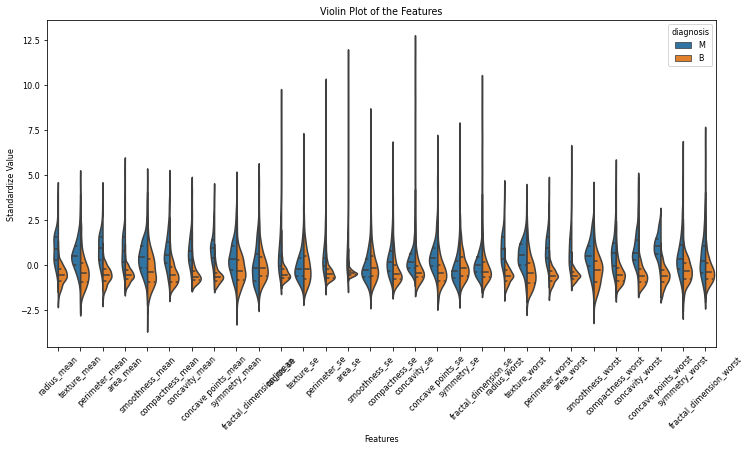

In [80]:
violin_plot(extracted_df.columns[0:30], "Violin Plot of the Features")

Index(['diagnosis', 'features', 'value'], dtype='object')


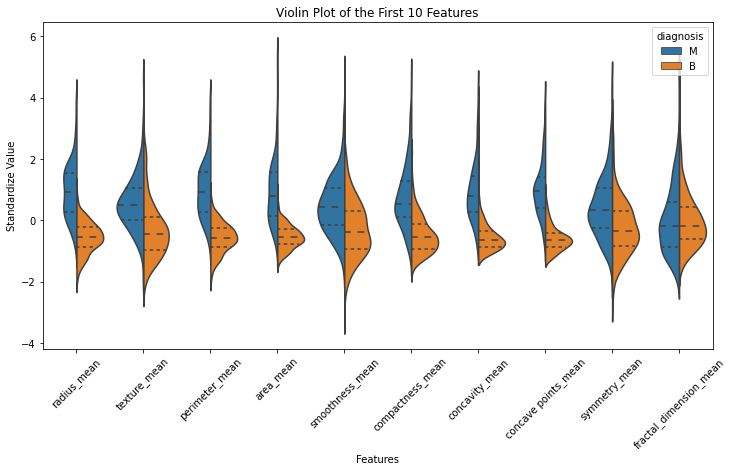

In [64]:
violin_plot(extracted_df.columns[0:30], "Violin Plot of the First 10 Features")

features == 'radius_mean' or features == 'texture_mean' or features == 'perimeter_mean' or features == 'area_mean' or features == 'smoothness_mean' or features == 'compactness_mean' or features == 'concavity_mean' or features == 'concave points_mean' or features == 'symmetry_mean' or features == 'fractal_dimension_mean'


/home/etta/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/etta/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/etta/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/etta/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/etta/miniconda3/envs/py39/lib/

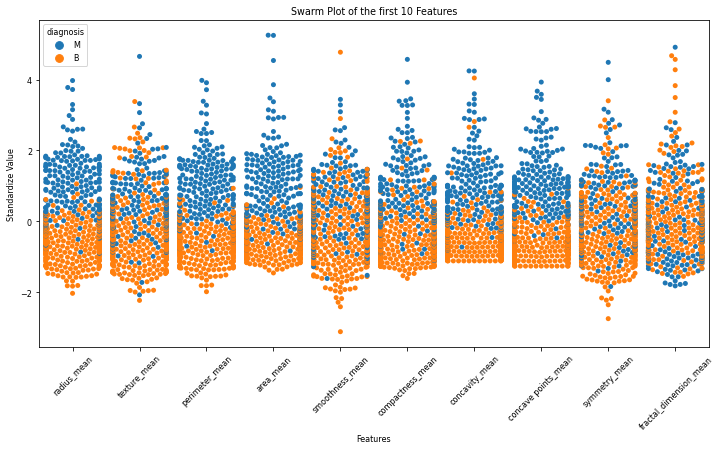

In [85]:
swarm_plot(extracted_df.columns[0:10], "Swarm Plot of the first 10 Features")

features == 'radius_se' or features == 'texture_se' or features == 'perimeter_se' or features == 'area_se' or features == 'smoothness_se' or features == 'compactness_se' or features == 'concavity_se' or features == 'concave points_se' or features == 'symmetry_se' or features == 'fractal_dimension_se'


/home/etta/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/etta/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/etta/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/etta/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/etta/miniconda3/envs/py39/lib/

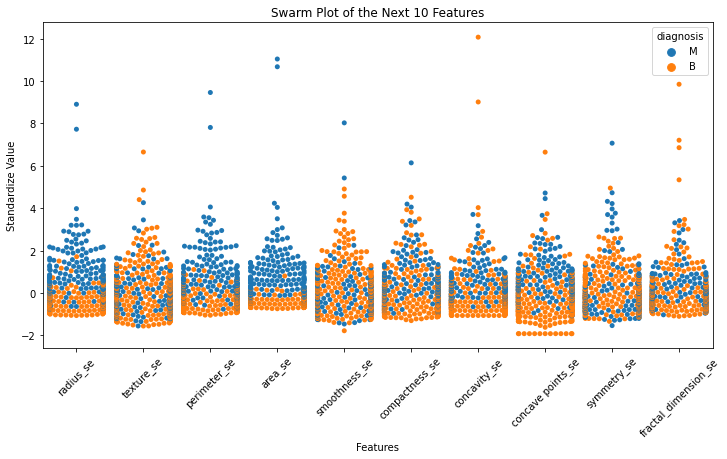

In [67]:
swarm_plot(extracted_df.columns[10:20], "Swarm Plot of the Next 10 Features")

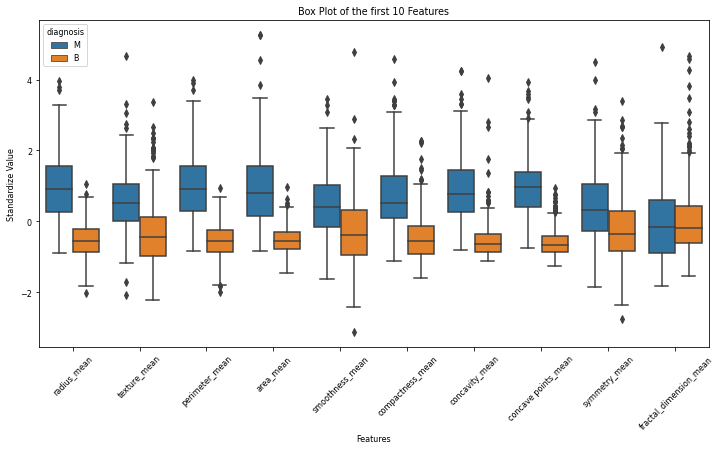

In [84]:
box_plot(extracted_df.columns[0:10], "Box Plot of the first 10 Features")

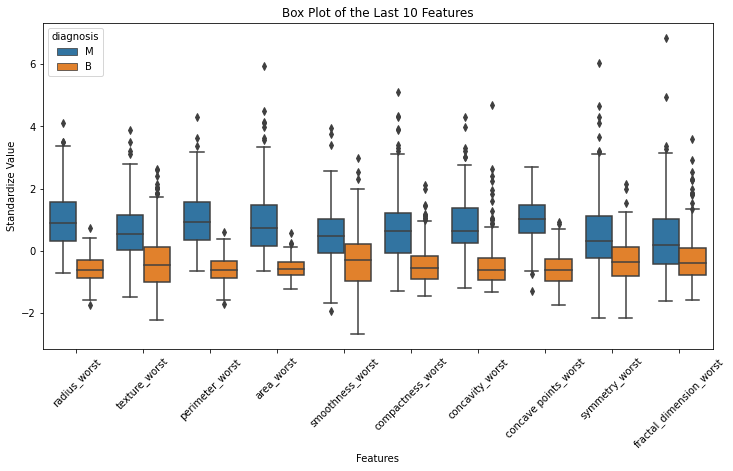

In [72]:
box_plot(extracted_df.columns[20:30], "Box Plot of the Last 10 Features")

The violin plot is very efficient in comparing distributions of different variables. The classification becomes clear in the swarm plot. Finally, the box plots are useful in comparing median and detecing outliers.

From above plots we can draw some insights from the data:

The median of some features are very different between 'malignant' and 'benign'. This seperation can be seen clearly in the box plots. They can be very good features for classification. For examples: mean radius, mean area, mean concave points, worst radius, worst perimeter, worst area, worst concave points.
However, there are distributions looking similar between 'malignant' and 'benign'. For examples: mean smoothness, mean symmetry, mean fractual dimension, smoothness error. These features are weak in classifying data.
Some features have similar distributions, thus might be highly correlated with each other. For example: mean perimeter vs. mean area, mean concavity vs. mean concave points, and worst symmetry vs. worst fractal dimension. We should not include all these hightly correlated varibles in our predicting model.

/tmp/ipykernel_9074/2222587995.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat, dtype=np.bool)


<AxesSubplot:>

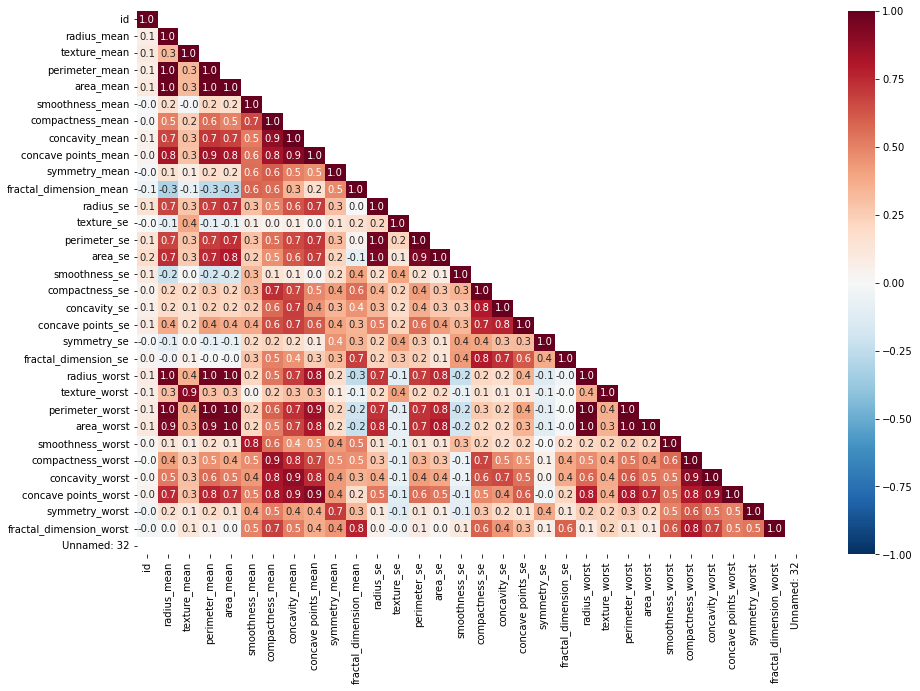

In [73]:
# Create correlation matrix
corr_mat = diagnostic_df.corr()

# Create mask
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,
            mask=mask)

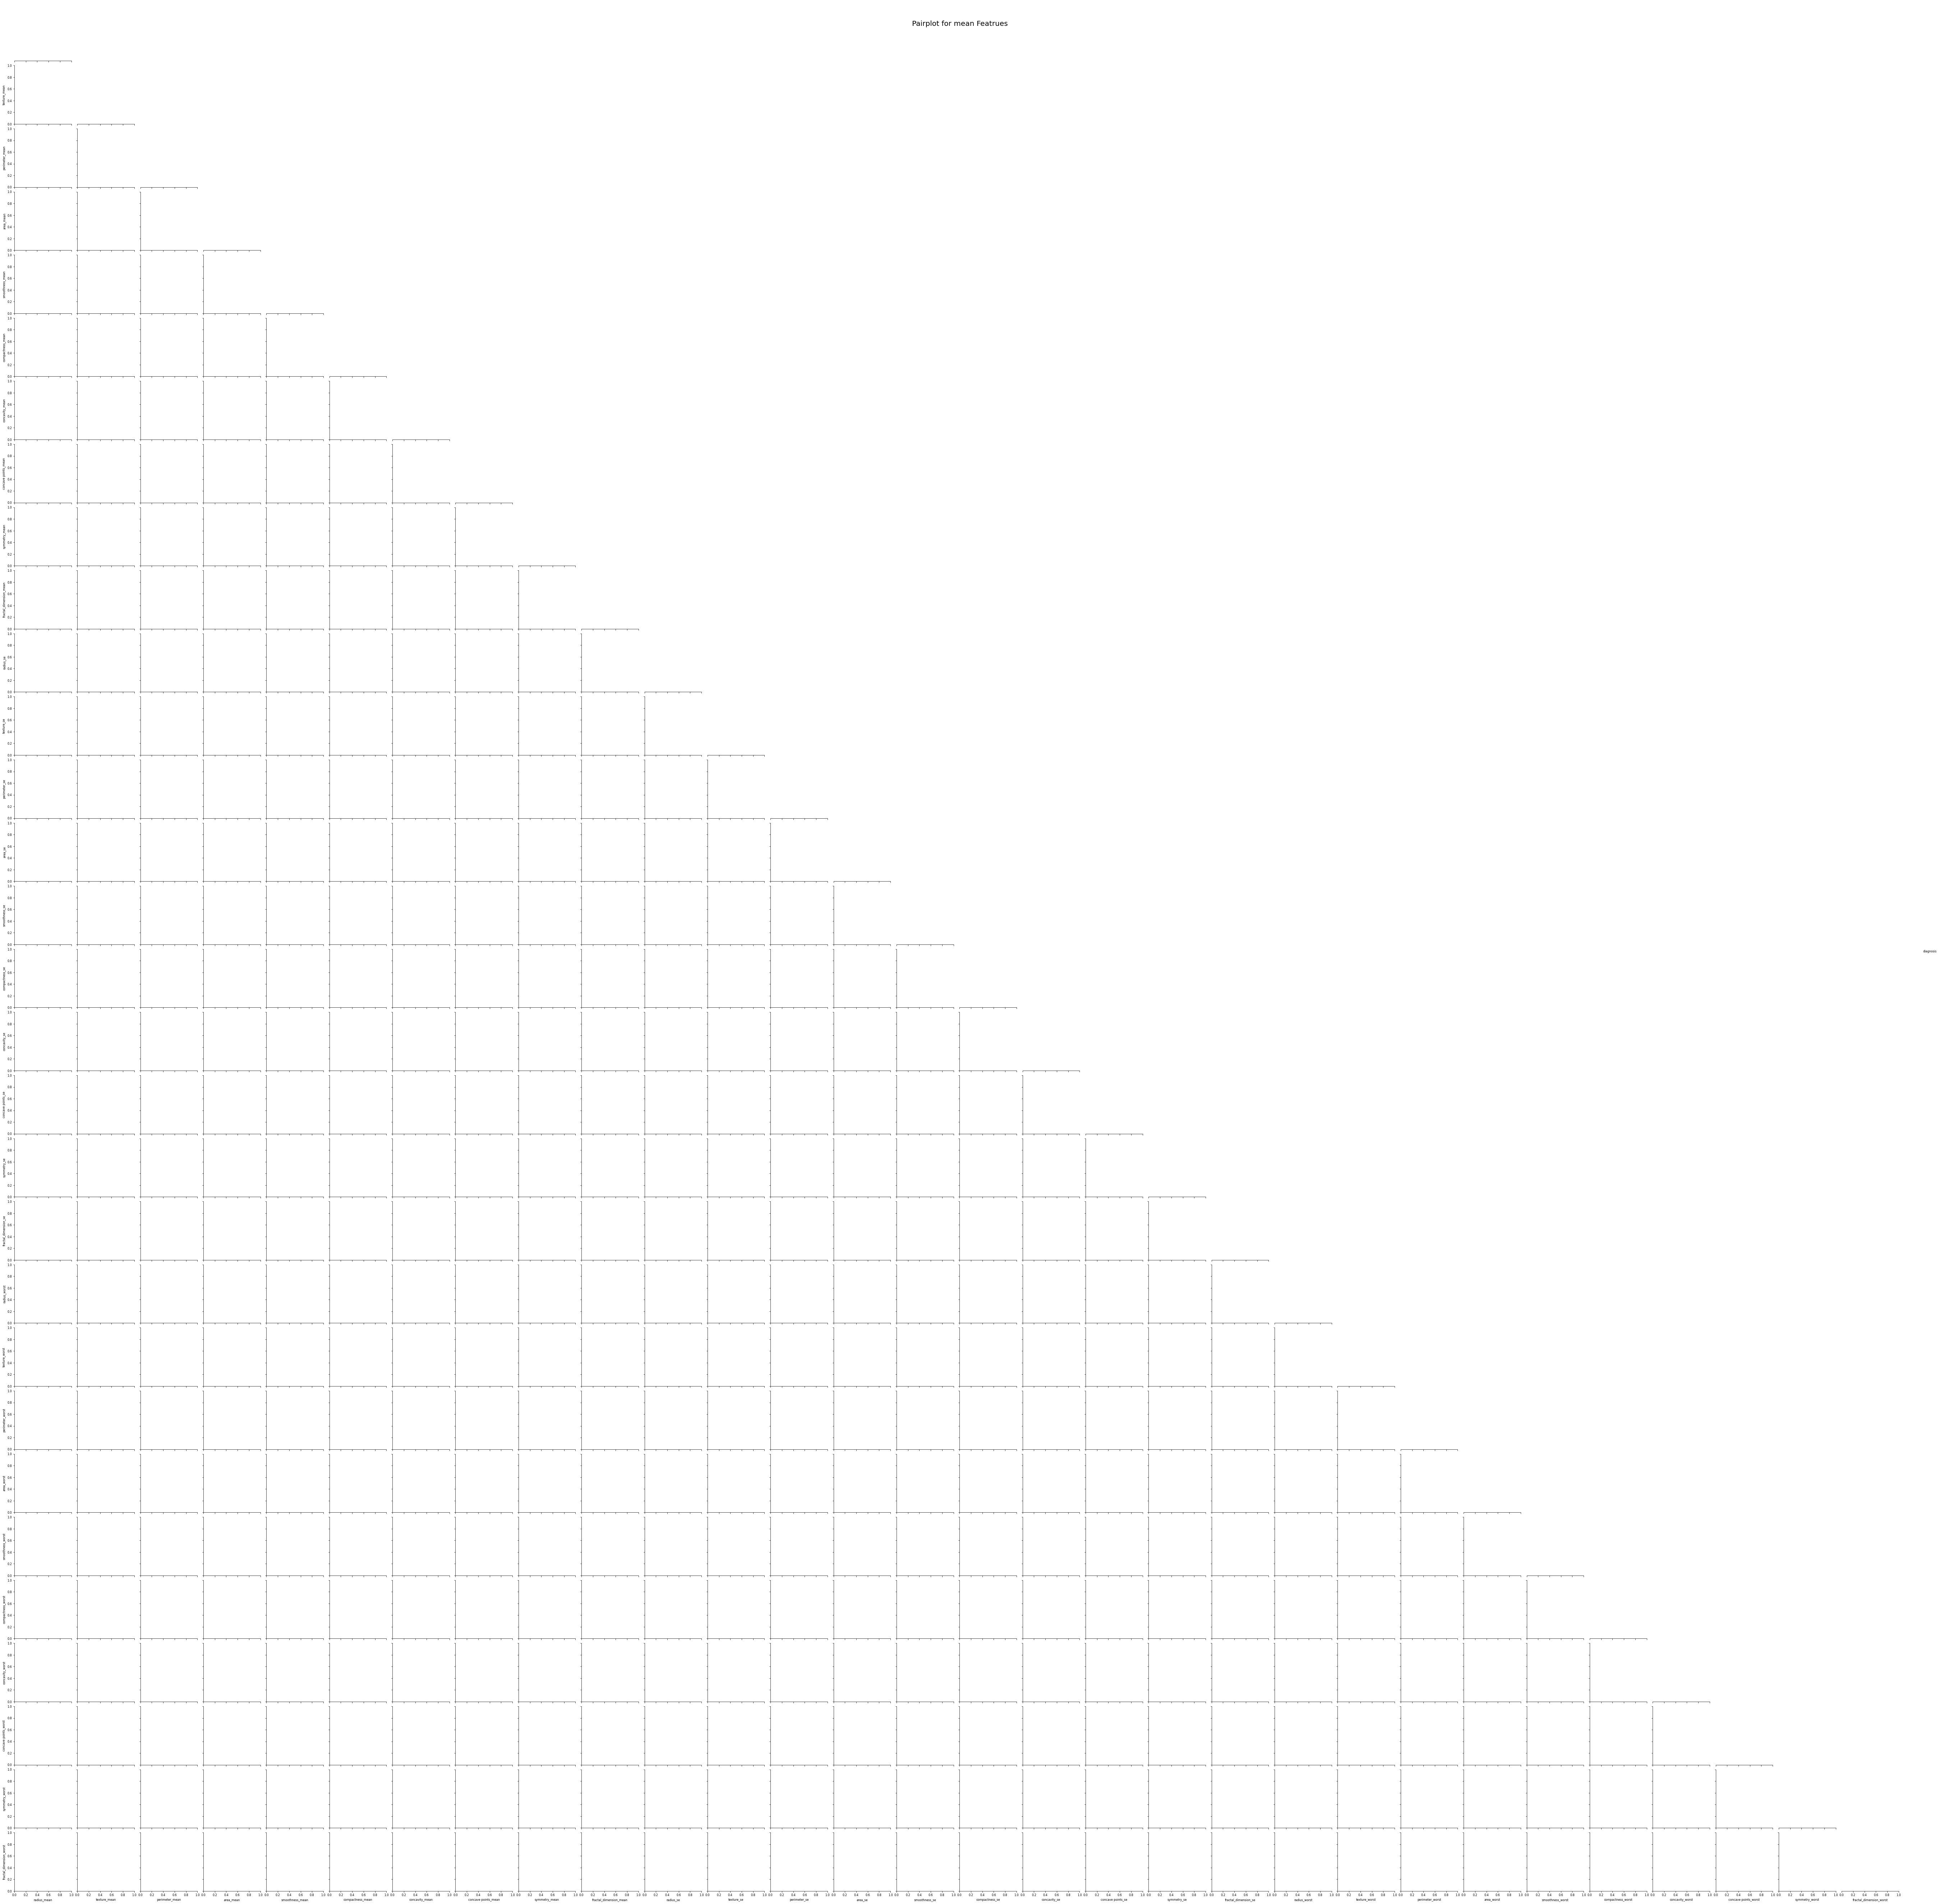

In [79]:
def pairplot(dfx):
    # name = str([x for x in globals() if globals()[x] is dfx][0])
    x="mean"
    # if name == 'df_mean':
    #     x = "Mean"
    # elif name == 'df_se':
    #     x = "Squared Error"
    # elif name == 'df_worst':
    #     x = "Worst"
    
    sns.pairplot(data=dfx, hue='diagnosis', palette='crest', corner=True).fig.suptitle('Pairplot for {} Featrues'.format(x), fontsize = 20)
data = pd.concat([target,extracted_df[:0:10]], axis=1)
pairplot(data)